In [1]:
import math
import numpy as np
def f(x):
    return np.log(x+1) - 2*x**2 + 1

#Производная f(x)
def dfdx(x):
    return 1/(x + 1) - 4*x

#Функция x=f*(x)
def f_it(x):
    return np.sqrt((np.log(x+1)+1)/2)  

#Производная f*(x)
def df_itdx(x):
    return 1/((2*x + 2) * np.sqrt(2 * (np.log(x + 1) + 1)))

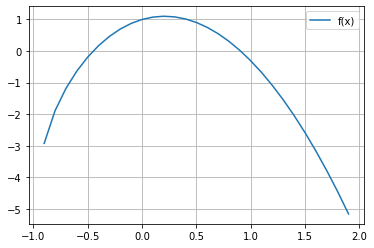

In [4]:
import matplotlib.pyplot as plt

x = np.arange(-0.9, 2, .1)
y = np.array([f(i) for i in x])

x_1 = np.arange(-0.5, 2, .1)
y_1 = np.array([dfdx(i) for i in x_1])

plt.plot(x, y, label="f(x)")
#plt.plot(x_1, y_1, label="f'(x)")

plt.legend()
plt.grid()
plt.show()

In [5]:
#Метод половинного деления
def half_method(f, a, b, eps,it=0):
    c = (a+b)/2
    if f(a)*f(c)<0:
        b=c
    else:
        a=c
    if abs(b-a)<eps:
        print("Количество иттераций: ",it)
        print("f=",f((a+b)/2))
        return (a+b)/2
    else:
        it+=1
        return half_method(f,a ,b, eps, it)
    
#Метод простых итераций
def simple_itt_method(f, a, b, eps):
    x = (a+b)/2
    fx=f_it(x)
    ffx=f_it(fx)
    it=1
    while abs(fx-ffx)>=eps:
        it+=1
        fx=ffx
        ffx=f_it(fx)
    print("Количество иттераций: ",it)
    print("f=",f(ffx))
    return ffx  

#Метод Ньютона
def newton_method(f, a, b, eps):
    x = (a+b)/2
    it=1
    x_new = x - (f(x)/dfdx(x))
    while abs(x-x_new)>=eps:
        x=x_new
        x_new = x - (f(x)/dfdx(x))
        it+=1
    print("Количество иттераций: ",it)
    print(f"f= {f(x_new):f}")
    return x_new

#Метод секущих
def secant_method(f, a, b, eps):
    x_1 = (a+b)/2
    it=1
    x_2 = x_1 - (f(x_1)/(f(x_1)-f(a)))*(x_1-a)
    x_3 = x_2 - (f(x_2)/(f(x_2)-f(x_1)))*(x_2-x_1)
    while abs(x_2-x_3)>=eps:
        x_1=x_2
        x_2=x_3
        x_3 = x_2 - (f(x_2)/(f(x_2)-f(x_1)))*(x_2-x_1)
        it+=1
    print("Количество иттераций: ",it)
    print(f"f= {f(x_3):f}")
    return x_3

In [6]:
print(f"x = {half_method(f, .5, 1, 0.001)}")

Количество иттераций:  8
f= 0.0010454547459797237
x = 0.90673828125


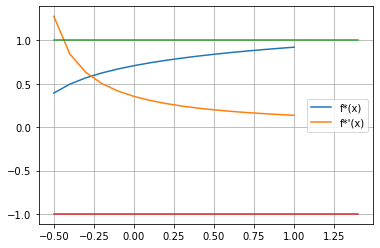

In [7]:
x_2 = np.arange(-0.5, 1.1, .1)
fi = np.array([f_it(i) for i in x_2])

x_3 = np.arange(-0.5, 1.1, .1)
fi_1 = np.array([df_itdx(i) for i in x_3])

plt.plot(x_2, fi, label="f*(x)")
plt.plot(x_3, fi_1, label="f*'(x)")

gr = np.arange(-0.5, 1.5, .1)
plt.plot(gr, np.array([1 for i in range(len(gr))]))
plt.plot(gr, np.array([-1 for i in range(len(gr))]))

plt.legend()
plt.grid()
plt.show()

In [8]:
print(f"x = {simple_itt_method(f, .5, 1, 0.001)}")

Количество иттераций:  3
f= 0.00022709760173378335
x = 0.9070020070162144


In [9]:
print(f"x = {newton_method(f, .5, 1, 0.001)}")

Количество иттераций:  3
f= -0.000000
x = 0.9070752454797887


In [10]:
print(f"x = {secant_method(f, .5, 1, 0.001)}")

Количество иттераций:  3
f= -0.000007
x = 0.9070775896642713
